In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np
from utils import *


import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from re import sub


DATA_DIR = '/mnt/ernie_main/000_Data/SEEG/SEEG_Periictal/data/Extracted_Per_Event_Interictal'
subj = 'Epat03'
f = "Epat03_1_FBTC_interictal_monopole.mat"
ts_struct = load_mat(os.path.join(DATA_DIR, subj, f))

In [34]:
ch =ts_struct['channels']
sfreq = ts_struct['sfreq'][0][0]
X = ts_struct['monopole'][0:-1,:]


n, t = X.shape

print(f"Loaded {X.shape} sampled at {sfreq})")
print(f"Total {t} samples -> {t//sfreq}s of data")

Loaded (135, 150000) sampled at 500.0)
Total 150000 samples -> 300.0s of data


In [39]:
np.corrcoef(X[:, i], X[:, i+1])[1,1]

np.float64(0.9999999999999998)

In [49]:
# X = np.random.random((n, t))
# C = np.corrcoef(X.T)
# assert(X.shape==(t, t))
# np.diag(C, 1)

##
# normalize amnplitude (preprocess)
X = X - X.mean(axis=1).reshape(n,1)
X = X / X.std(axis=1).reshape(n,1)
trc = np.zeros((t,1))
for i in range(t-1):
    trc[i,:] = np.corrcoef(X[:, i], X[:, i+1])[0,1]

##

# 
# X = X - X.mean(1)
# X = X / X.std(1)

# compute the actual measure
# X = X - X.mean(0)
# X = X / np.linalg.norm(X, 0)
# trc = np.sum(X[:,:-1] * X[:, 2:], 0)
             






In [52]:
np.corrcoef(X[:, i], X[:, i+1])

array([[1.        , 0.98038847],
       [0.98038847, 1.        ]])

(0.5483705334982405, 1.0036089956378584)

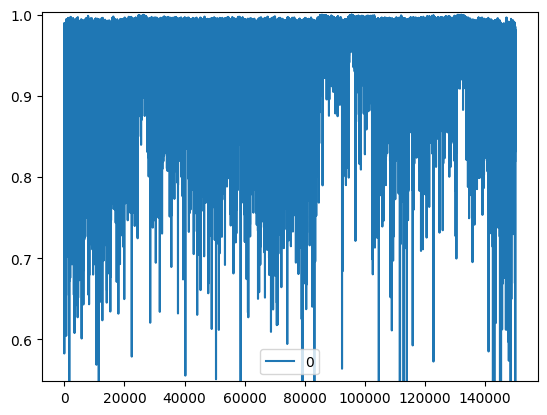

In [58]:
sns.lineplot(trc)
plt.ylim(np.mean(trc)-np.std(trc)*10, np.mean(trc)+np.std(trc)*1.2)
#TODO: examine on an SOZ vs PZ vs NIZ
# then run peri-ictally